In [3]:
#1.Загрузить файл hr.csv.

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline
from scipy.stats import pearsonr

In [46]:
data = pd.read_csv(r'C:\Users\af.sabirova\Desktop\pyda\HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
print('Среднее значение по уровню удовлетворенности: ', statistics.mean(data['satisfaction_level']))
print('Среднее значение по последней оценке: ',statistics.mean(data['last_evaluation']))
print('Среднее значение по количеству проектов: ',statistics.mean(data['number_project']))
print('Среднее значение по часам в месяц: ',statistics.mean(data['average_montly_hours']))
print('Среднее значение по стажу: ',statistics.mean(data['time_spend_company']))

Среднее значение по уровню удовлетворенности:  0.6128335222348157
Среднее значение по последней оценке:  0.7161017401160077
Среднее значение по количеству проектов:  3.80305353690246
Среднее значение по часам в месяц:  201.0503366891126
Среднее значение по стажу:  3.498233215547703


In [15]:
print('Медиана по уровню удовлетворенности: ', statistics.median(data['satisfaction_level']))
print('Медиана по последней оценке: ',statistics.median(data['last_evaluation']))
print('Медиана по количеству проектов: ',statistics.median(data['number_project']))
print('Медиана по часам в месяц: ',statistics.median(data['average_montly_hours']))
print('Медиана по стажу: ',statistics.median(data['time_spend_company']))

Медиана по уровню удовлетворенности:  0.64
Медиана по последней оценке:  0.72
Медиана по количеству проектов:  4
Медиана по часам в месяц:  200
Медиана по стажу:  3


In [18]:
print('Мода по уровню удовлетворенности: ', statistics.mode(data['satisfaction_level']))
print('Мода по последней оценке: ',statistics.mode(data['last_evaluation']))
print('Мода по количеству проектов: ',statistics.mode(data['number_project']))
print('Мода по стажу: ',statistics.mode(data['time_spend_company']))

Мода по уровню удовлетворенности:  0.1
Мода по последней оценке:  0.55
Мода по количеству проектов:  4
Мода по стажу:  3


In [20]:
print('Минимум по уровню удовлетворенности: ', min(data['satisfaction_level']))
print('Минимум по последней оценке: ',min(data['last_evaluation']))
print('Минимум по количеству проектов: ',min(data['number_project']))
print('Минимум по часам в месяц: ',min(data['average_montly_hours']))
print('Минимум по стажу: ',min(data['time_spend_company']))

Минимум по уровню удовлетворенности:  0.09
Минимум по последней оценке:  0.36
Минимум по количеству проектов:  2
Минимум по часам в месяц:  96
Минимум по стажу:  2


In [21]:
print('Максимум по уровню удовлетворенности: ', max(data['satisfaction_level']))
print('Максимум по последней оценке: ',max(data['last_evaluation']))
print('Максимум по количеству проектов: ',max(data['number_project']))
print('Максимум по часам в месяц: ',max(data['average_montly_hours']))
print('Максимум по стажу: ',max(data['time_spend_company']))

Максимум по уровню удовлетворенности:  1.0
Максимум по последней оценке:  1.0
Максимум по количеству проектов:  7
Максимум по часам в месяц:  310
Максимум по стажу:  10


In [22]:
print('Стандартное отклонение по уровню удовлетворенности: ', statistics.pstdev(data['satisfaction_level']))
print('Стандартное отклонение по последней оценке: ',statistics.pstdev(data['last_evaluation']))
print('Стандартное отклонение по количеству проектов: ',statistics.pstdev(data['number_project']))
print('Стандартное отклонение по часам в месяц: ',statistics.pstdev(data['average_montly_hours']))
print('Стандартное отклонение по стажу: ',statistics.pstdev(data['time_spend_company']))

Стандартное отклонение по уровню удовлетворенности:  0.2486223626820733
Стандартное отклонение по последней оценке:  0.1711634045107436
Стандартное отклонение по количеству проектов:  1.2325512654823438
Стандартное отклонение по часам в месяц:  49.94143446256218
Стандартное отклонение по стажу:  1.4600875552715114


In [ ]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [27]:
#Рассчитаем корреляцию Пирсона для некоторых переменных
corr, p_value = pearsonr(data['satisfaction_level'], data['last_evaluation'])
print(corr)

0.1050212139714849


In [28]:
corr, p_value = pearsonr(data['average_montly_hours'], data['number_project'])
print(corr)

0.417210634401777


In [ ]:
#Вывод: Среднее отработанное количество часов и количество проектов имеют б'ольшую корреляцию. 
#чем уровень удовлетворенности и последняя оценка

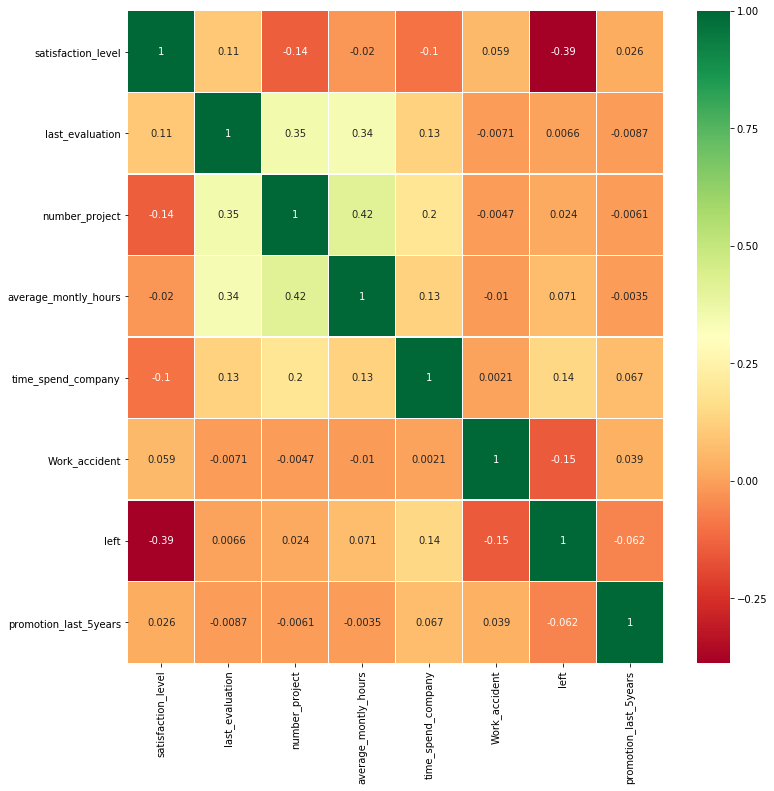

In [28]:
import seaborn as sns
correlation_matrix = sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


In [ ]:
#4.Визуализировать несколько взаимосвязей между переменными.

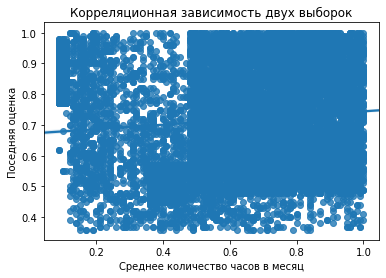

In [39]:
sns.regplot(x= data['satisfaction_level'], y=data['last_evaluation'],data=data, fit_reg=True)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Последняя оценка')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

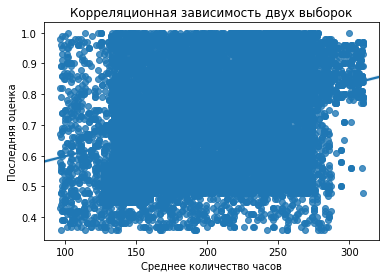

In [42]:
sns.regplot(x= data['average_montly_hours'], y=data['last_evaluation'],data=data, fit_reg=True)
plt.xlabel('Среднее количество часов')
plt.ylabel('Последняя оценка')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

In [ ]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [12]:
many_time=data.loc[(data['time_spend_company']>3)&(data['salary']=='low')]['left']
short_time=data.loc[(data['time_spend_company']<3)&(data['salary']=='high')]['left']
tt=stats.ttest_ind(many_time, short_time)
tt

Ttest_indResult(statistic=15.754446474075602, pvalue=1.0414883380372868e-53)

In [15]:
IT=data.loc[(data['sales']=='IT')]['number_project']
hr=data.loc[(data['sales']=='hr')]['number_project']
tt=stats.ttest_ind(IT, hr)
tt

Ttest_indResult(statistic=2.8357885233245397, pvalue=0.004618099160733461)

In [ ]:
#В обеих взаимосвязях pvalue меньше 5%, поэтому мы не можеи принять нулевую гипотезу. 

In [19]:
IT=data.loc[(data['sales']=='IT')]['time_spend_company']
hr=data.loc[(data['sales']=='hr')]['time_spend_company']
tt=stats.ttest_ind(IT, hr)
tt

Ttest_indResult(statistic=1.8291467985189855, pvalue=0.06752917069625797)

In [20]:
#В третьей взаимосвязи pvalue больше 5%, поэтому мы принимаем нулевую гипотезу, их средние значения идентичны.  

In [ ]:
#6.Рассчитать сколько работников работает в каждом департаменте.

In [68]:
data.groupby('sales').agg(['count'])['left']

,count
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [ ]:
#Наибольшее количество людей работают в отделе Sales

In [ ]:
#7.Показать распределение сотрудников по зарплатам.

In [67]:
data.groupby('salary').agg(['count'])['left']

,count
salary,
high,1237
low,7316
medium,6446


In [ ]:
#Большинство сотрудников получают низкую зар. плату

In [ ]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [66]:
data.groupby(['sales', 'salary']).agg(['count'])['left']

count
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

In [ ]:
#9.Сколько сотрудников покинули компанию.

In [70]:
print('Компанию покинули: ' ,sum(data['left']), 'сотрудников')

Компанию покинули:  3571 сотрудников


In [ ]:
#10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

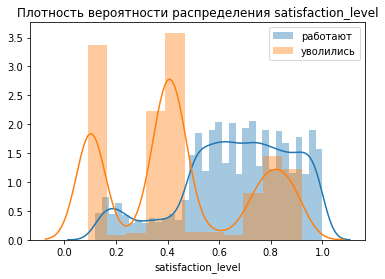

In [6]:
work = data[data['left']==0]['satisfaction_level']
left = data[data['left']==1]['satisfaction_level']
sns.distplot(work)
sns.distplot(left)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['работают', 'уволились'])
plt.show()

In [ ]:
#Низкий уровень удовлетворенности является одной из причин увольнения сотрудников.

In [38]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level
0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,1,1,1,1,1,1,1,1,1
2,1.0,1.0,1,1,1,1,1,1,1,1,1
3,0.0,0.0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0,0,0,0,0,0,0,0,0


In [47]:
drop_column = ['sales', 'salary']
data.drop(drop_column, axis=1, inplace = True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [52]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

y = data.left
X = data.drop('left', axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [16]:
from sklearn.metrics import classification_report
# разделим датасет на зависимые переменные и таргет значение (X и Y)
y = data.left
X = data.drop('left', axis=1)

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2916
           1       0.49      0.26      0.34       834

    accuracy                           0.78      3750
   macro avg       0.65      0.59      0.60      3750
weighted avg       0.74      0.78      0.75      3750



In [18]:
from sklearn.utils import resample

# создадим вектор X как общие данные (X и Y)
X = pd.concat([X_train, y_train], axis=1)

# разделим на 2 класса - fraud и non-fraud
not_quit = X[X.left==0]
quit = X[X.left==1]

# генерируем данные для класса с меньшим количеством элементов
quit_upsampled = resample(quit,
                          replace=True, # элемент с заменой
                          n_samples=len(not_quit), # кол-во эл-тов =кол-во эл-ов в бОльшей выборке
                          random_state=27) # выбираем переменную для random

# объединим полученные класс с бОльшей выборкой
upsampled = pd.concat([not_quit, quit_upsampled])

# проверим количество классов теперь
upsampled.left.value_counts()

1    8512
0    8512
Name: left, dtype: int64

In [19]:
y_train = upsampled.left
X_train = upsampled.drop('left', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

print(classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2916
           1       0.47      0.79      0.59       834

    accuracy                           0.76      3750
   macro avg       0.70      0.77      0.71      3750
weighted avg       0.82      0.76      0.77      3750



In [22]:
# уменьшаем выборку в бОльшим количеством элементов
not_quit_downsampled = resample(not_quit,
                                replace = False, # без замены
                                n_samples = len(quit), # количество = кол-во эл-тов в меньшей выборке
                                random_state = 27) # 

# объединим полученные данные с меньшей выборкой
downsampled = pd.concat([not_quit_downsampled, quit])

# проверим количество
downsampled.left.value_counts()

1    2737
0    2737
Name: left, dtype: int64

In [23]:
y_train = downsampled.left
X_train = downsampled.drop('left', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

print(classification_report(y_test, undersampled_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2916
           1       0.47      0.78      0.59       834

    accuracy                           0.75      3750
   macro avg       0.70      0.76      0.70      3750
weighted avg       0.82      0.75      0.77      3750



In [ ]:
#В данном случае уменьшение и увеличение количества данных для балансироваки привело к едва заметному улучшению модели. 

In [58]:
y = data["left"]
#drop department & left
columns = ['left']
data = data.drop(columns, axis=1)
col = data.columns
X = data[col]
X
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [62]:
my_d_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_d_tree = my_d_tree.fit(X_train, y_train)

In [63]:
print(my_d_tree.feature_importances_) 
print(my_d_tree.score(X, y))

[5.27402901e-01 1.51609614e-01 1.03710088e-01 7.23137617e-02
 1.44882903e-01 8.07321075e-05 0.00000000e+00]
0.9833988932595507


In [ ]:
#Попробуем метод Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(X_train, y_train)


print(my_forest.score(X, y))
print(my_d_tree.feature_importances_)

0.9825988399226615
[5.27402901e-01 1.51609614e-01 1.03710088e-01 7.23137617e-02
 1.44882903e-01 8.07321075e-05 0.00000000e+00]


In [ ]:
#Данная модель дала точность предсказания 98%

In [ ]:
#11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете